(12, 94, 192)


Text(0.5, 1.0, 'Zonal mean surface temperature (degC)')

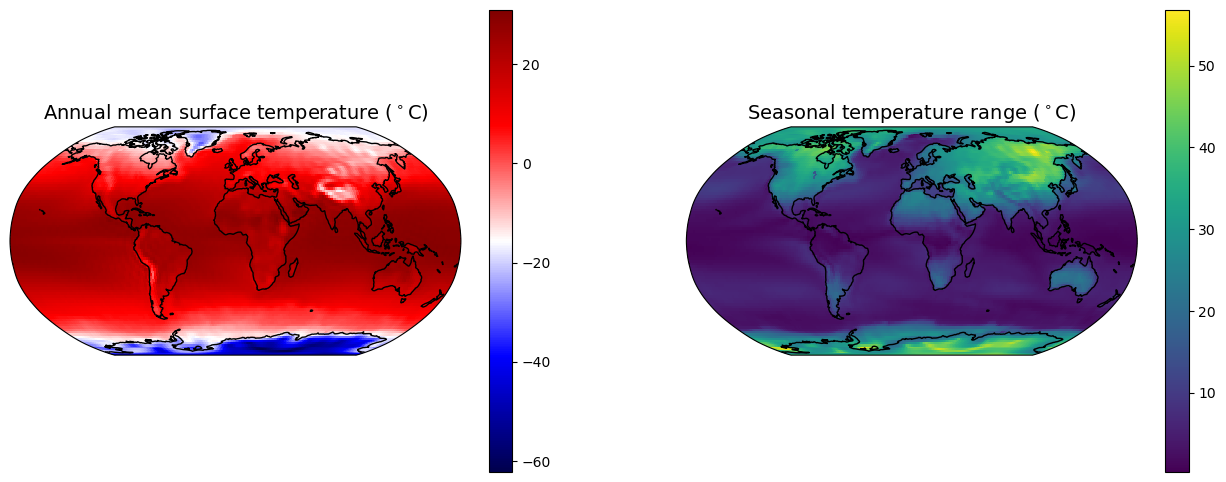

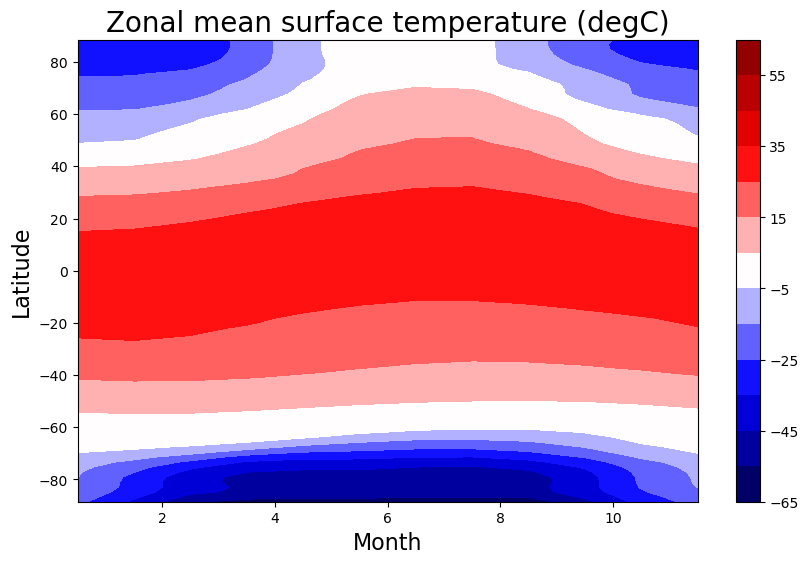

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import climlab
from climlab import constants as const
import cartopy.crs as ccrs  # use cartopy to make some maps

ncep_url = "/Users/yuchiaol_ntuas/Desktop/ebooks/data/"
#ncep_url = "http://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
ncep_Ts = xr.open_dataset(ncep_url + "skt.sfc.mon.1981-2010.ltm.nc", decode_times=False)
# Alternative source from the University of Hawai'i
#url = "http://apdrc.soest.hawaii.edu:80/dods/public_data/Reanalysis_Data/NCEP/NCEP/clima/"
#ncep_Ts = xr.open_dataset(url + 'surface_gauss/skt')
lat_ncep = ncep_Ts.lat; lon_ncep = ncep_Ts.lon
Ts_ncep = ncep_Ts.skt
print( Ts_ncep.shape)

maxTs = Ts_ncep.max(dim='time')
minTs = Ts_ncep.min(dim='time')
meanTs = Ts_ncep.mean(dim='time')

fig = plt.figure( figsize=(16,6) )

ax1 = fig.add_subplot(1,2,1, projection=ccrs.Robinson())
cax1 = ax1.pcolormesh(lon_ncep, lat_ncep, meanTs, cmap=plt.cm.seismic , transform=ccrs.PlateCarree())
cbar1 = plt.colorbar(cax1)
ax1.set_title('Annual mean surface temperature ($^\circ$C)', fontsize=14 )

ax2 = fig.add_subplot(1,2,2, projection=ccrs.Robinson())
cax2 = ax2.pcolormesh(lon_ncep, lat_ncep, maxTs - minTs, transform=ccrs.PlateCarree() )
cbar2 = plt.colorbar(cax2)
ax2.set_title('Seasonal temperature range ($^\circ$C)', fontsize=14)

for ax in [ax1,ax2]:
    #ax.contour( lon_cesm, lat_cesm, topo.variables['LANDFRAC'][:], [0.5], colors='k');
    #ax.set_xlabel('Longitude', fontsize=14 ); ax.set_ylabel('Latitude', fontsize=14 )
    ax.coastlines()

Tmax = 65; Tmin = -Tmax; delT = 10
clevels = np.arange(Tmin,Tmax+delT,delT)
fig_zonobs, ax = plt.subplots( figsize=(10,6) )
cax = ax.contourf(np.arange(12)+0.5, lat_ncep, 
                  Ts_ncep.mean(dim='lon').transpose(), levels=clevels, 
                  cmap=plt.cm.seismic, vmin=Tmin, vmax=Tmax)
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16 )
cbar = plt.colorbar(cax)
ax.set_title('Zonal mean surface temperature (degC)', fontsize=20)


1.991063797294792e-07


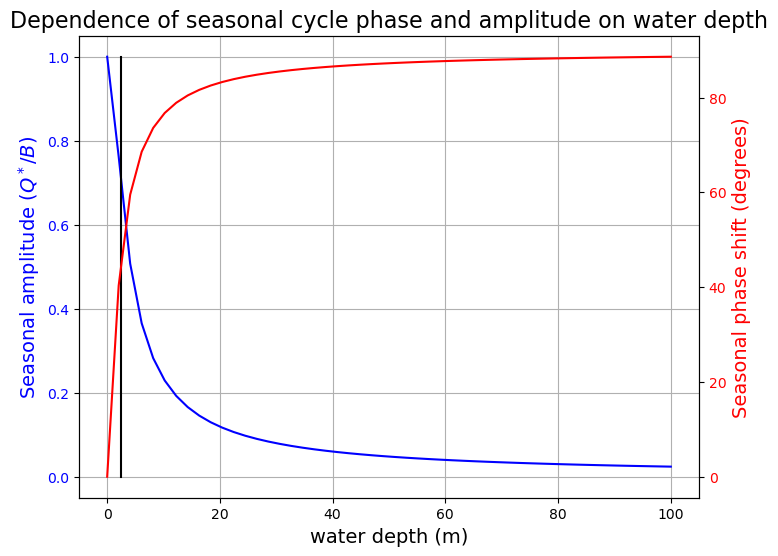

In [2]:
omega = 2*np.pi / const.seconds_per_year
print(omega)

B = 2.
Hw = np.linspace(0., 100.)
Ctilde = const.cw * const.rho_w * Hw * omega / B
amp = 1./((Ctilde**2+1)*np.cos(np.arctan(Ctilde)))
Phi = np.arctan(Ctilde)

color1 = 'b'
color2 = 'r'

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(Hw, amp, color=color1)
ax1.set_xlabel('water depth (m)', fontsize=14)
ax1.set_ylabel('Seasonal amplitude ($Q^* / B$)', fontsize=14,  color=color1)
for tl in ax1.get_yticklabels():
    tl.set_color(color1)
ax2 = ax1.twinx()
ax2.plot(Hw, np.rad2deg(Phi), color=color2)
ax2.set_ylabel('Seasonal phase shift (degrees)', fontsize=14, color=color2)
for tl in ax2.get_yticklabels():
    tl.set_color(color2)
ax1.set_title('Dependence of seasonal cycle phase and amplitude on water depth', fontsize=16)
ax1.grid()

ax1.plot([2.5, 2.5], [0, 1], 'k-');

